In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np

In [2]:
# Load the CSV Data
csv_file_path = 'evolution_data.csv'  # Path to the CSV file
df = pd.read_csv(csv_file_path)  # Load the CSV data into a pandas DataFrame

# Display the first few rows of the DataFrame to verify the data
df.head()

,Run,Generation,Leg Index,Individual Index,Fitness,Amplitude,Phase,Offset
0,1,0,0,0,7.853638,"[0.31025870140303813, 0.4565175821827506, 0.01...","[2.942319759122308, 3.7276556890290244, 1.1301...","[-0.2595807281697605, 0.45518256698300175, -0...."
1,1,0,0,1,6.378695,"[0.33886928123541643, 0.49459263824138644, 0.1...","[1.7325774653716697, 4.1994426393730455, 5.185...","[0.3054740837380602, -0.38712619539427917, -0...."
2,1,0,0,2,6.026611,"[0.4533901719436516, 0.3190715673097963, 0.436...","[4.312260940064782, 6.212969257168915, 4.73237...","[0.4686054851335376, -0.30342049824271833, -0...."
3,1,0,0,3,5.583398,"[0.4933256270007205, 0.21868362617466908, 0.34...","[0.22943924597943066, 5.9946424767453, 3.59860...","[0.22889334216979917, -0.281894597703662, -0.0..."
4,1,0,0,4,6.362194,"[0.0979293720813984, 0.028608403766965607, 0.3...","[0.33865211737196005, 1.7630426499878527, 4.89...","[-0.48447461255153446, -0.4985889434586942, 0...."


In [3]:
# Parse the Data
# Extract relevant columns from the DataFrame
fitness_values = df.iloc[:, 4]  # Assuming the fitness values are in the 5th column
generation_numbers = df.iloc[:, 0]  # Assuming the generation numbers are in the 1st column

# Convert the fitness values to numeric, if they are not already
fitness_values = pd.to_numeric(fitness_values, errors='coerce')

# Combine the generation numbers and fitness values into a new DataFrame
parsed_data = pd.DataFrame({
    'Generation': generation_numbers,
    'Fitness': fitness_values
})

# Display the first few rows of the parsed data to verify
parsed_data.head()

,Generation,Fitness
0,1,7.853638
1,1,6.378695
2,1,6.026611
3,1,5.583398
4,1,6.362194


In [4]:
# Find the Generation with Maximum Fitness
# Group the data by generation and calculate the maximum fitness for each generation
max_fitness_per_generation = parsed_data.groupby('Generation')['Fitness'].max()

# Identify the generation with the maximum fitness value
max_fitness_generation = max_fitness_per_generation.idxmax()
max_fitness_value = max_fitness_per_generation.max()

# Display the generation with the maximum fitness value and the corresponding fitness value
print(f"Generation with maximum fitness: {max_fitness_generation}")
print(f"Maximum fitness value: {max_fitness_value}")

Generation with maximum fitness: 102
Maximum fitness value: 47.709095686039056


Generation with maximum fitness: 102
Maximum fitness value: 47.709095686039056


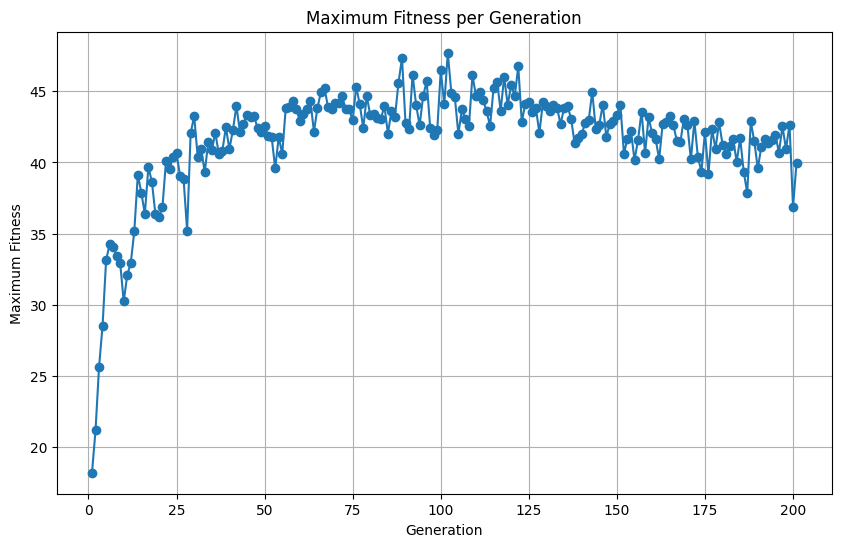

In [5]:
# Display the Results
import matplotlib.pyplot as plt

# Display the generation with the maximum fitness value and the corresponding fitness value
print(f"Generation with maximum fitness: {max_fitness_generation}")
print(f"Maximum fitness value: {max_fitness_value}")

# Plot the maximum fitness values per generation
plt.figure(figsize=(10, 6))
plt.plot(max_fitness_per_generation.index, max_fitness_per_generation.values, marker='o')
plt.title('Maximum Fitness per Generation')
plt.xlabel('Generation')
plt.ylabel('Maximum Fitness')
plt.grid(True)
plt.show()

In [ ]:
# Find best individuals of a given generation

# Load the CSV data
data = pd.read_csv('evolution_data.csv')

def find_max_fitness_individuals(generation):
    # Filter data for the specified generation
    gen_data = data[data['Generation'] == generation]
    
    # Find the maximum fitness individual for each leg
    max_fitness_individuals = gen_data.loc[gen_data.groupby('Leg Index')['Fitness'].idxmax()]
    
    # Print the results
    for index, row in max_fitness_individuals.iterrows():
        print(f"Generation {int(row['Generation'])}, Leg {int(row['Leg Index'])}, Best Fitness: {row['Fitness']:.3f}, Amplitude: {row['Amplitude']}, Phase: {row['Phase']}, Offset: {row['Offset']}")

# Example usage: find max fitness individuals for generation 0
find_max_fitness_individuals(173)

Generation 173, Leg 0, Best Fitness: 34.841, Amplitude: [0.43831071765889634, 0.22982459933128208, 0.40474376399621165], Phase: [2.6053081902375905, 2.1852569225117136, 5.5301641881437265], Offset: [0.30810934097249976, -0.17384095226724, 0.6576787036633847]
Generation 173, Leg 1, Best Fitness: 37.986, Amplitude: [0.4576284095143736, 0.5024981555482625, 0.48355408836715685], Phase: [5.6968808338698995, 0.5967829094984891, 0.9227174725547085], Offset: [0.44177107508512203, -0.05448034684052128, -0.3525184205480242]
Generation 173, Leg 2, Best Fitness: 37.768, Amplitude: [0.21849918967521612, 0.4133149900892378, 0.050097318978620714], Phase: [1.5591052618199082, 2.58184125892355, 0.8582093567214713], Offset: [0.5153245216848419, 0.4166076923258343, 0.5568999759025417]
Generation 173, Leg 3, Best Fitness: 39.362, Amplitude: [0.37305167178225473, 0.2764136175442889, 0.27919058042799166], Phase: [1.7564542631129554, 5.948677975914173, 3.662869179502622], Offset: [0.5008066667107679, -0.1707